<a href="https://colab.research.google.com/github/kanvaudupa-bioinfo/Bioinfo-lab/blob/main/Info_Prog_8_Phylogenetic_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alignment files from Clustalomega tool from EBI used to generate phylogenetic tree (neighbour joining algorithm)

In [ ]:
from google.colab import files
uploads = files.upload()

Saving Clustaloutput.aln-phylip to Clustaloutput.aln-phylip


In [ ]:
pip install Bio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.3/321.3 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.8 MB/s eta 0:00:00


Number of sequences: 7
Alignment length: 8410

Distance Matrix:
XM_0313754  0.000000
XM_0556283  0.668252    0.000000
gi|1364976  0.662069    0.019263    0.000000
gi|1686434  0.662901    0.019976    0.007253    0.000000
XM_0198291  0.370155    0.702140    0.703329    0.703448    0.000000
XM_0046714  0.683353    0.040309    0.039239    0.040547    0.697503    0.000000
XM_0324009  0.380380    0.708918    0.709037    0.709512    0.113080    0.701902    0.000000
    XM_0313754  XM_0556283  gi|1364976  gi|1686434  XM_0198291  XM_0046714  XM_0324009


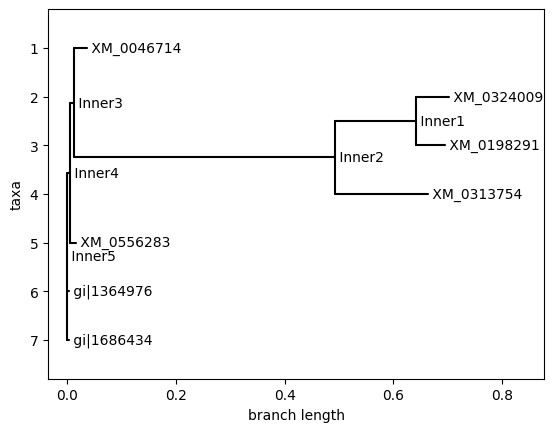

   _ XM_0046714
  |
 ,|                                                           _____ XM_0324009
 ||                                             _____________|
 ||____________________________________________|             |____ XM_0198291
 |                                             |
 |                                             |_______________ XM_0313754
 |
_| XM_0556283
 |
 | gi|1364976
 |
 | gi|1686434



In [ ]:
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio import Phylo
import matplotlib.pyplot as plt

#Read the alignment file (PHYLIP format)
alignment = AlignIO.read("Clustaloutput.aln-phylip", "phylip")

print("Number of sequences:", len(alignment))
print("Alignment length:", alignment.get_alignment_length())

#Compute distance matrix using identity model
calculator = DistanceCalculator('identity')
distance_matrix = calculator.get_distance(alignment)

print("\nDistance Matrix:")
print(distance_matrix)

#Construct phylogenetic tree using Neighbor-Joining
constructor = DistanceTreeConstructor(calculator, 'nj')
tree = constructor.build_tree(alignment)

# Display the tree
Phylo.draw(tree)  # graphical display
plt.show()

